In [1]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm
%matplotlib notebook

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale

In [22]:
iris = load_iris()
Xs = scale(iris.data)
y = iris.target

iris_df = pd.DataFrame(Xs, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
s = pd.Series(y, dtype="category")
s.cat.categories = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
iris_df["Class"] = s
iris_df['y'] = y

cases2 = [['Sepal width', 'Sepal length'], ['Sepal length', 'Petal width'], \
         ['Sepal width', 'Petal width'], ['Sepal length', 'Petal length'], \
         ['Sepal length', 'Petal width'], ['Petal width', 'Petal length']]
twoFeat = [iris_df.loc[:, cases2[i]] for i in range(6)]

cases3 = [['Sepal width', 'Sepal length','Petal width'],\
          ['Sepal length', 'Petal width', 'Petal length'],\
          ['Sepal length', 'Petal width', 'Petal length'],\
          ['Sepal width', 'Petal width', 'Petal length'],\
          ['Sepal width', 'Sepal length','Petal length']]
threeFeat = [iris_df.loc[:, cases3[i]] for i in range(4)]

cases4 = [['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
fourFeat = [iris_df.loc[:, cases4[i]] for i in range(1)]

feature_sets = [twoFeat, threeFeat, fourFeat]

In [47]:
# run models + plot accuracies

def gen_models(features, logreg_dict):
    # Fit models
    models2 = []
    for case in features[0]:
        logreg = LogisticRegression(**logreg_dict)
        logreg.fit(case, iris_df.loc[:, 'y'])
        models2.append(logreg)

    models3 = []
    for case in features[1]:
        logreg = LogisticRegression(**logreg_dict)
        logreg.fit(case, iris_df.loc[:, 'y'])
        models3.append(logreg)

    models4 = []
    for case in features[2]:
        logreg = LogisticRegression(**logreg_dict)
        logreg.fit(case, iris_df.loc[:, 'y'])
        models4.append(logreg)

    # Get scores
    scores2 = np.zeros(len(models2))
    for i, model in enumerate(models2):
        scores2[i] = model.score(features[0][i], iris_df.loc[:, 'y'])

    scores3 = np.zeros(len(models3))
    for i, model in enumerate(models3):
        scores3[i] = model.score(features[1][i], iris_df.loc[:, 'y'])

    scores4 = np.zeros(len(models4))
    for i, model in enumerate(models4):
        scores4[i] = model.score(features[2][i], iris_df.loc[:, 'y'])
    
    return [models2, models3, models4, scores2, scores3, scores4]

In [111]:
def plot_cases_vals(vals, ylabel, title, ylim=None): 
    acc_fig, acc_ax = plt.subplots(1, 2)
    x = [i + 1 for i in range(11)]
    acc_ax[0].bar(np.array([0, 1, 2, 3, 4, 5]), vals[0][:6], color='orchid', label='Two Features')
    acc_ax[0].bar(np.array([6, 7, 8, 9]), vals[0][6:10], color='forestgreen', label='Three Features')
    acc_ax[0].bar(np.array([10]), vals[0][10], color='mediumpurple', label='Four Features')
    acc_ax[0].set_xlabel("Cases")
    acc_ax[0].set_ylabel(ylabel)
    acc_ax[0].set_ylim(ylim)

    acc_ax[0].legend()
    acc_ax[0].set_title(title[0])
    
    acc_ax[1].bar(np.array([0, 1, 2, 3, 4, 5]), vals[1][:6], color='orchid', label='Two Features')
    acc_ax[1].bar(np.array([6, 7, 8, 9]), vals[1][6:10], color='forestgreen', label='Three Features')
    acc_ax[1].bar(np.array([10]), vals[1][10], color='mediumpurple', label='Four Features')
    acc_ax[1].set_xlabel("Cases")
    acc_ax[1].set_ylabel(ylabel)
    acc_ax[1].set_ylim(ylim)
    acc_ax[1].legend()
    acc_ax[1].set_title(title[1])
    
    acc_fig.show()

## 3: Using the Scikit-Learn Library, train the Logistic Regression model using the following:

### 3.1: All six cases of using two features at a time.

In [4]:
# Fit models
models2 = []
for case in twoFeat:
    logreg = LogisticRegression(multi_class='multinomial')
    logreg.fit(case, iris_df.loc[:, 'y'])
    models2.append(logreg)
    
# Get predictions
preds2 = np.zeros((len(models2), iris_df.shape[0]))
for i, model in enumerate(models2):
    y_hat = model.predict(twoFeat[i])
    preds2[i] = y_hat
    
# Calculate accuracy on training data
acc2 = np.zeros(len(preds2))
for i, y_hat in enumerate(preds2):
    acc2[i] = (np.mean(y_hat==iris_df.loc[:, 'y']))
    
print(acc2)

[0.813 0.96  0.953 0.953 0.96  0.953]


### 3.2: All four cases of using three features at a time.

In [5]:
# Fit models
models3 = []
for case in threeFeat:
    logreg = LogisticRegression(multi_class='multinomial')
    logreg.fit(case, iris_df.loc[:, 'y'])
    models3.append(logreg)
    
# Get predictions
preds3 = np.zeros((len(models3), iris_df.shape[0]))
for i, model in enumerate(models3):
    y_hat = model.predict(threeFeat[i])
    preds3[i] = y_hat

# Calculate accuracy on training data
acc3 = np.zeros(len(preds3))
for i, y_hat in enumerate(preds3):
    acc3[i] = (np.mean(y_hat==iris_df.loc[:, 'y']))
    
print(acc3)

[0.96  0.953 0.953 0.973]


### 3.3: The one case of using all features at once.

In [6]:
# Fit models
models4 = []
for case in fourFeat:
    logreg = LogisticRegression(multi_class='multinomial')
    logreg.fit(case, iris_df.loc[:, 'y'])
    models4.append(logreg)
    
# Get predictions
preds4 = np.zeros((len(models4), iris_df.shape[0]))
for i, model in enumerate(models4):
    y_hat = model.predict(fourFeat[i])
    preds4[i] = y_hat

# Calculate accuracy on training data
acc4 = np.zeros(len(preds4))
for i, y_hat in enumerate(preds4):
    acc4[i] = (np.mean(y_hat==iris_df.loc[:, 'y']))
    
print(acc4)

[0.973]


## Comparison of solvers and convergence times

## 4: Summarize your results (i.e, what’s the best accuracy you can obtain for each of the 11 cases you considered, how many iterations does it take to converge, anything else you think is relevant and important) in a table.

### Accuracy

<IPython.core.display.Javascript object>


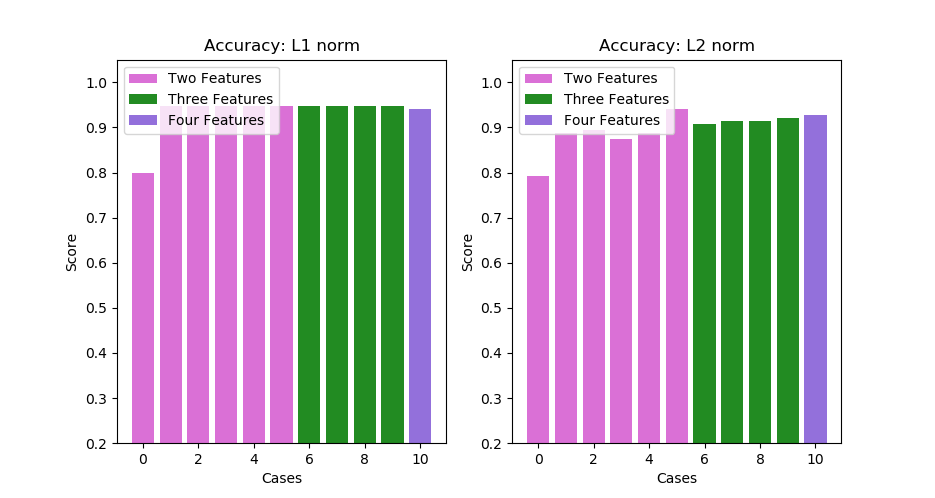

In [98]:
acc_comp1 = {'C':1, 'penalty':'l1', 'solver':'liblinear'}
acc_comp2 = {'C':1, 'penalty':'l2', 'solver':'liblinear'}
acc1 = gen_models(feature_sets, acc_comp1)
acc2 = gen_models(feature_sets, acc_comp2)

acc1scores = np.concatenate([np.array(acc1[3]), np.array(acc1[4]), np.array(acc1[5])])
acc2scores = np.concatenate([np.array(acc2[3]), np.array(acc2[4]), np.array(acc2[5])])

ylabel = "Score"
titles = ["Accuracy: L1 norm", "Accuracy: L2 norm"]
plot_cases_vals([acc1scores, acc2scores], ylabel, titles, ylim=(0.2, 1.05))

### Convergence

<IPython.core.display.Javascript object>


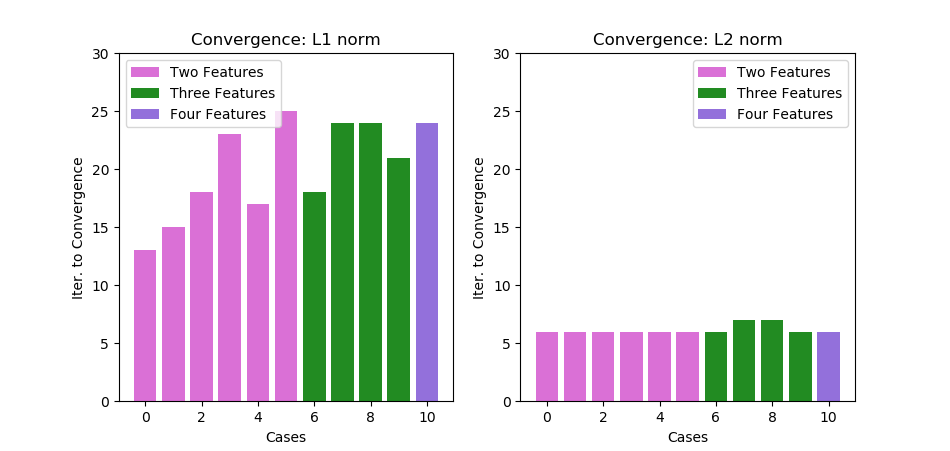

In [99]:
cvg_comp1 = {'C':1, 'penalty':'l1', 'solver':'liblinear'}
cvg_comp2 = {'C':1, 'penalty':'l2', 'solver':'liblinear'}
c1 = gen_models(feature_sets, cvg_comp1)
c2 = gen_models(feature_sets, cvg_comp2)

cvgmodels1 = [c1[0], c1[1], c1[2]]
cvgmodels2 = [c2[0], c2[1], c2[2]]
iterations1 = []
iterations2 = []

for i in range(len(cvgmodels1)):
    for j in range(len(cvgmodels1[i])):
        iterations1.append(max(cvgmodels1[i][j].n_iter_))
        
for i in range(len(cvgmodels2)):
    for j in range(len(cvgmodels2[i])):
        iterations2.append(max(cvgmodels2[i][j].n_iter_))
    
ylabel = "Iter. to Convergence"
titles = ["Convergence: L1 norm", "Convergence: L2 norm"]
plot_cases_vals([iterations1, iterations2], ylabel, titles, ylim=(0, 30))

In [8]:
case_labels = [cases2, cases3, cases4]
features = [twoFeat, threeFeat, fourFeat]
models = [models2, models3, models4]
preds = [preds2, preds3, preds4]
accuracies = [acc2, acc3, acc4]
iterations = []

for i in range(len(models)):
    print(i + 2, "features:")
    for j in range(len(models[i])):
        print("case", j + 1, ':', case_labels[i][j])
        accuracy = np.array(accuracies[i][j])
        print('accuracy: {:.2%}'.format(accuracy))
        iterations.append(max(models[i][j].n_iter_))
        print("num. iterations:", models[i][j].n_iter_,'\n')

2 features:
case 1 : ['Sepal width', 'Sepal length']
accuracy: 81.33%
num. iterations: [15] 

case 2 : ['Sepal length', 'Petal width']
accuracy: 96.00%
num. iterations: [15] 

case 3 : ['Sepal width', 'Petal width']
accuracy: 95.33%
num. iterations: [15] 

case 4 : ['Sepal length', 'Petal length']
accuracy: 95.33%
num. iterations: [19] 

case 5 : ['Sepal length', 'Petal width']
accuracy: 96.00%
num. iterations: [15] 

case 6 : ['Petal width', 'Petal length']
accuracy: 95.33%
num. iterations: [18] 

3 features:
case 1 : ['Sepal width', 'Sepal length', 'Petal width']
accuracy: 96.00%
num. iterations: [21] 

case 2 : ['Sepal length', 'Petal width', 'Petal length']
accuracy: 95.33%
num. iterations: [25] 

case 3 : ['Sepal length', 'Petal width', 'Petal length']
accuracy: 95.33%
num. iterations: [25] 

case 4 : ['Sepal width', 'Petal width', 'Petal length']
accuracy: 97.33%
num. iterations: [21] 

4 features:
case 1 : ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
accuracy: 

### Solver convergence comparison

In [7]:
case4 = iris_df.loc[:, ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
y_df = iris_df.loc[:, 'y']

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

print('Multi-class: one-vs-rest\n')
for s in solvers:
    print("solver = ", s)
    logreg = LogisticRegression(solver=s, verbose=1, multi_class='ovr')
    logreg.fit(case4, y_df)
    accuracy = '{:.3%} accuracy'.format(np.mean(logreg.predict(case4) == y_df))
    print(accuracy)
    print('iterations:', logreg.n_iter_)
    print('\n')
    
print('Multi-class: multinomial\n')
for s in solvers:
    if s == 'liblinear':
        print('[multinomial not supported by liblinear solver]\n')
    else:
        print("solver = ", s)
        logreg = LogisticRegression(solver=s, verbose=1, multi_class='multinomial')
        logreg.fit(case4, y_df)
        accuracy = '{:.3%} accuracy'.format(np.mean(logreg.predict(case4) == y_df))
        print(accuracy)
        print('iterations:', logreg.n_iter_)
        print('\n')

Multi-class: one-vs-rest

solver =  newton-cg
94.667% accuracy
iterations: [9 8 9]


solver =  lbfgs
94.667% accuracy
iterations: [14 13 16]


solver =  liblinear
[LibLinear]92.667% accuracy
iterations: [6]


solver =  sag
convergence after 26 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
94.667% accuracy
iterations: [26 23 19]


solver =  saga
convergence after 47 epochs took 0 seconds
convergence after 42 epochs took 0 seconds
convergence after 49 epochs took 0 seconds
94.667% accuracy
iterations: [47 42 49]


Multi-class: multinomial

solver =  newton-cg
97.333% accuracy
iterations: [13]


solver =  lbfgs
97.333% accuracy
iterations: [25]


[multinomial not supported by liblinear solver]

solver =  sag
convergence after 26 epochs took 0 seconds
97.333% accuracy
iterations: [26]


solver =  saga
convergence after 44 epochs took 0 seconds
97.333% accuracy
iterations: [44]




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

## 5: Play with both L1 and L2 regularization and vary the regularization parameter C.

"Regularization" refers to the addition of a term to the cost function which penalizes weight vectors which are "large," where size is quantified by a norm defined on the weight vector. As a result the algorithm includes the value of the vector size in the cost function. The most commonly used norms are $L^{1}$ and $L^{2}$. The $L^{1}$ norm, also known as the Manhattan norm, is the sum of the values of the weight vector. The $L^{2}$ norm is the familiar Euclidean norm - the square root of the sum of squares of the vector values. Minimizing the "size" of the weight vector results in reducing the magnitude of the weights.

The regularization parameter $C$ specifies a coefficient which adjusts the weight of the regularization term. The term is multiplied by the inverse of $C$, so a larger value of $C$ results in a smaller regularization value. Very large values of $C$ can be used to approximate the result of a zero regularization term.

The model results show that higher regularization penalties result in lower accuracies. The cost function no longer optimizes purely for accuracy, but optimizes for both accuracy and weight sizes.

<IPython.core.display.Javascript object>


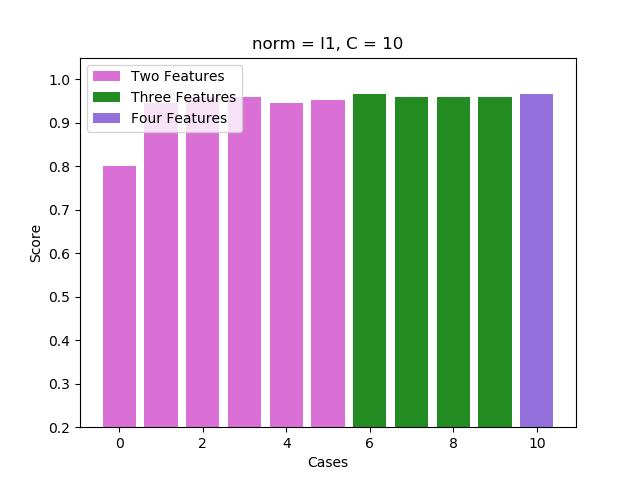

<IPython.core.display.Javascript object>


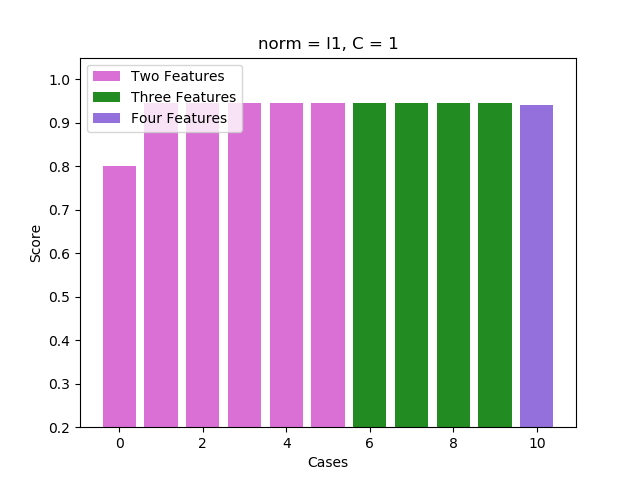

<IPython.core.display.Javascript object>


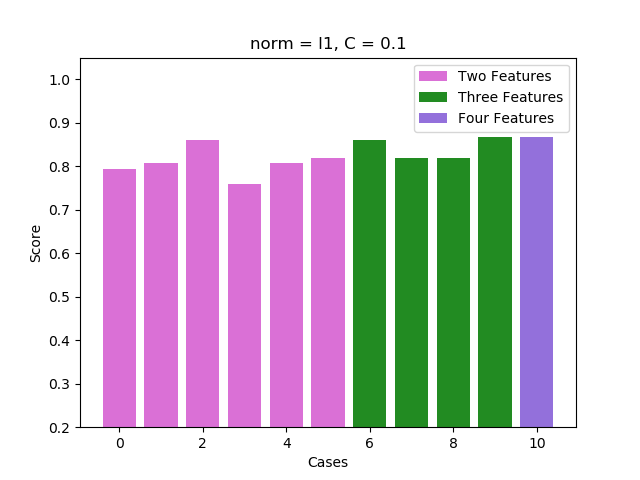

<IPython.core.display.Javascript object>


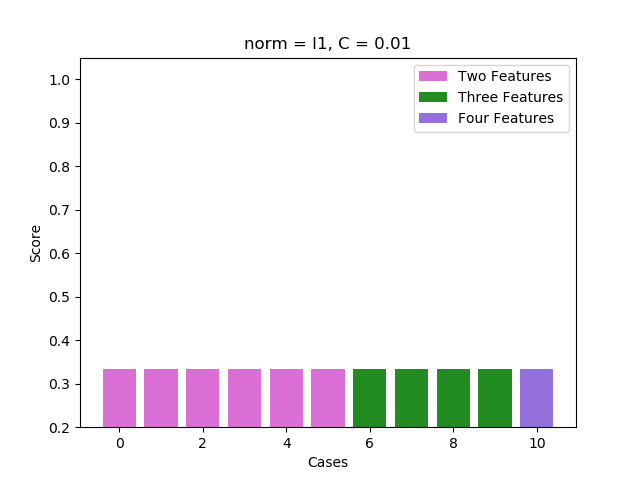

In [117]:
def plot_cases_val(val, ylabel, title): 
    fig, ax = plt.subplots()
    x = [i + 1 for i in range(11)]
    ax.bar(np.array([0, 1, 2, 3, 4, 5]), val[:6], color='orchid', label='Two Features')
    ax.bar(np.array([6, 7, 8, 9]), val[6:10], color='forestgreen', label='Three Features')
    ax.bar(np.array([10]), val[10], color='mediumpurple', label='Four Features')
    ax.set_xlabel("Cases")
    ax.set_ylabel(ylabel)
    ax.set_ylim(0.2, 1.05)
    ax.legend()
    ax.set_title(title)
    
    fig.show()

def plot_penalty_compare(feat, c_vals, penalty, solver):
    for val in c_vals:
        lrdict = {'C':val, 'penalty':penalty, 'solver':solver}    
        res = gen_models(feat, lrdict)
        scores = np.concatenate([np.array(res[3]), np.array(res[4]), np.array(res[5])])
        title = "norm = " + penalty +", C = " + str(val)
        plot_cases_val(scores, "Score", title)

# L1 regularization
plot_penalty_compare(feature_sets, [10, 1, 0.1, 0.01], 'l1', 'liblinear')

<IPython.core.display.Javascript object>


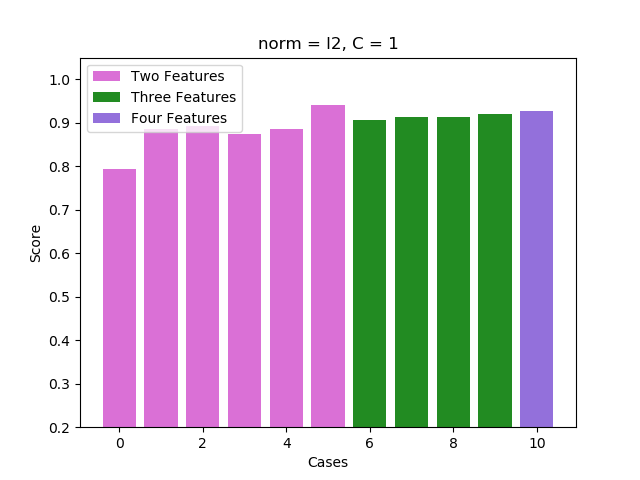

<IPython.core.display.Javascript object>


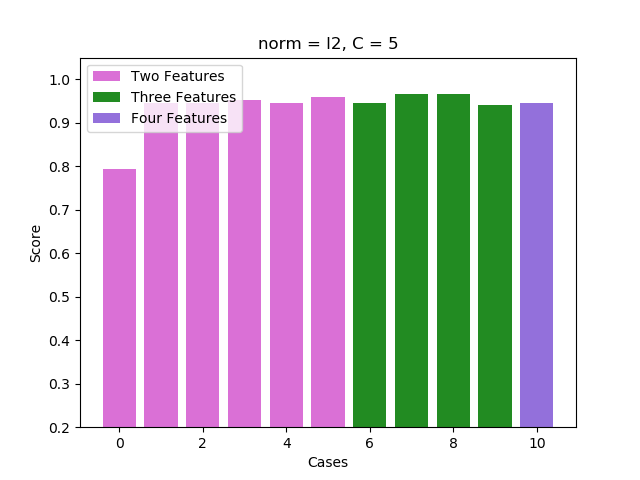

<IPython.core.display.Javascript object>


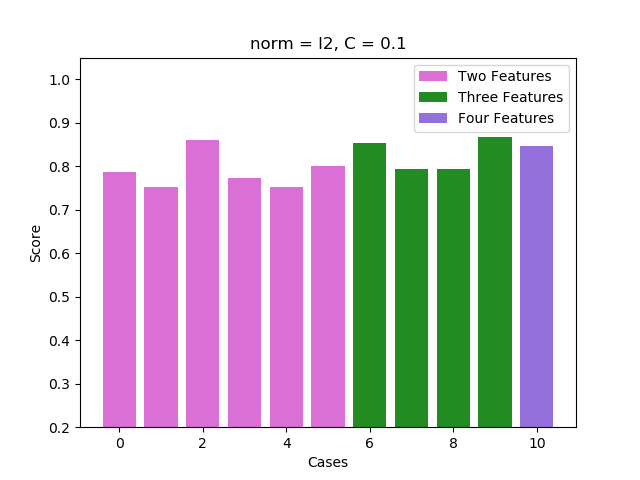

<IPython.core.display.Javascript object>


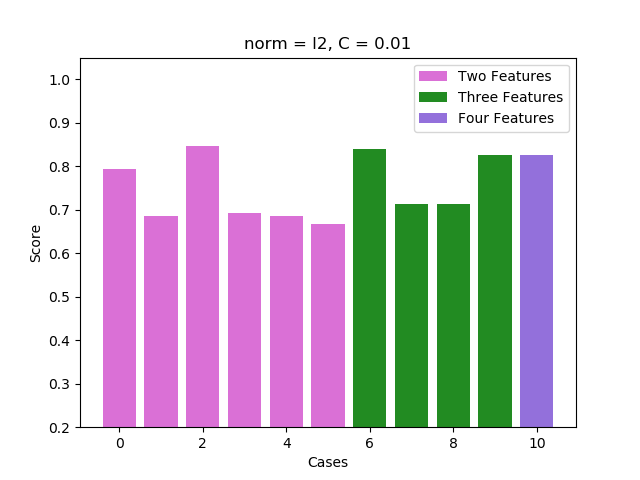

In [118]:
# L2 regularization
plot_penalty_compare(feature_sets, [1, 5, 0.1, 0.01], 'l2', 'liblinear')

## 6: Discuss your findings.  Does using more dimensions help when trying to classify the data in this dataset?  How important is regularization in these cases?

With less regularization, using more features increases accuracy, but when stronger regularization is applied, increasing the number of features used has less of an advantage.

### Visualization of weights

In [18]:
def plot_weights_C_reg(X, y, cvals):
    fig, axes = plt.subplots(3, 2)

    # Set regularization parameter
    for i, (C, axes_row) in enumerate(zip(cv, axes)):
        # turn down tolerance for short training time
        l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga').fit(X, y)
        #print("C=", C, "l1_LR weights", l1_LR.coef_)
        l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga').fit(X, y)

        coef_l1_LR = l1_LR.coef_.ravel()
        coef_l2_LR = l2_LR.coef_.ravel()

        print("C = %.2f" % C)
        print("{:<40} {:.2%}".format("Accuracy with L1 penalty:",
                                     l1_LR.score(X, y)))
        print("{:<40} {:.2%}".format("Accuracy with L2 penalty:",
                                     l2_LR.score(X, y)))

        if i == 0:
            axes_row[0].set_title("L1 penalty")
            axes_row[1].set_title("L2 penalty")

        classes = max(l1_LR.classes_.shape[0], l2_LR.classes_.shape[0])
        features = X.shape[1]
        ims = []
        for ax, coefs in zip(axes_row, [coef_l1_LR, coef_l2_LR]):
            im = ax.imshow(np.abs(coefs.reshape(classes, features)), interpolation='nearest',
                      cmap='RdPu')
            ims.append(im)
            ax.set_xticks(())
            ax.set_yticks(())
        
        
        axes_row[0].set_ylabel('C = %s' % C)

    return fig, axes, ims

In the heatmaps below, we can see the effects of different $C$ values and regularization norms on the weight values. Colors ranging from light to dark indicate small to large weight values. For a value of $C = 10$, the $L^{1}$ and $L^{2}$ results are the same because they both effectively represent no regularization. For smaller values of $C$, the $L^{1}$ norm produces more zero values than the L2 penalty.

<IPython.core.display.Javascript object>


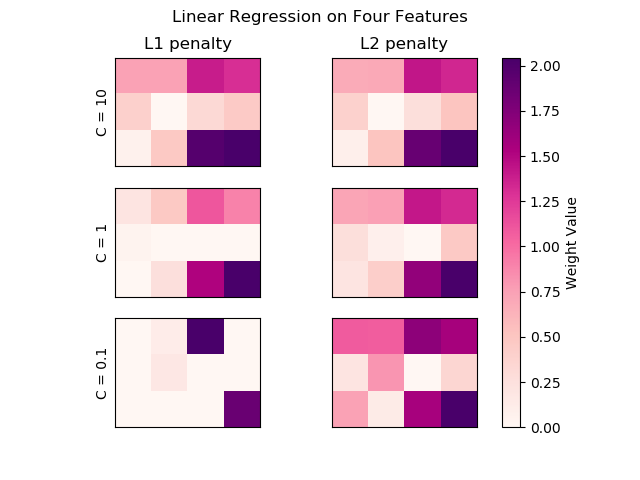

C = 10.00
Accuracy with L1 penalty:                98.00%
Accuracy with L2 penalty:                97.33%
C = 1.00
Accuracy with L1 penalty:                97.33%
Accuracy with L2 penalty:                97.33%
C = 0.10
Accuracy with L1 penalty:                94.67%
Accuracy with L2 penalty:                92.67%


In [102]:
cv = (10, 1, 0.1)
w_dict = {}

fig1, axes1, ims1 = plot_weights_C_reg(fourFeat[0], iris_df.loc[:, 'y'], cv)
cbar = fig1.colorbar(ims1[0], ax=axes1, label="Weight Value")
fig1.suptitle("Linear Regression on Four Features")
fig1.show()

<IPython.core.display.Javascript object>


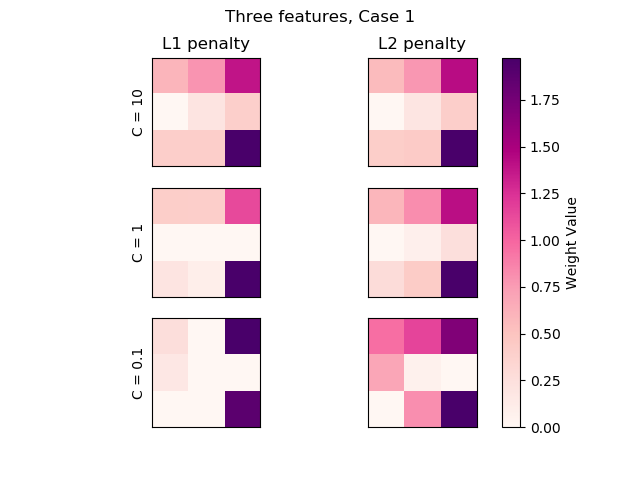

C = 10.00
Accuracy with L1 penalty:                96.67%
Accuracy with L2 penalty:                96.67%
C = 1.00
Accuracy with L1 penalty:                96.00%
Accuracy with L2 penalty:                96.00%
C = 0.10
Accuracy with L1 penalty:                94.67%
Accuracy with L2 penalty:                90.67%


<IPython.core.display.Javascript object>


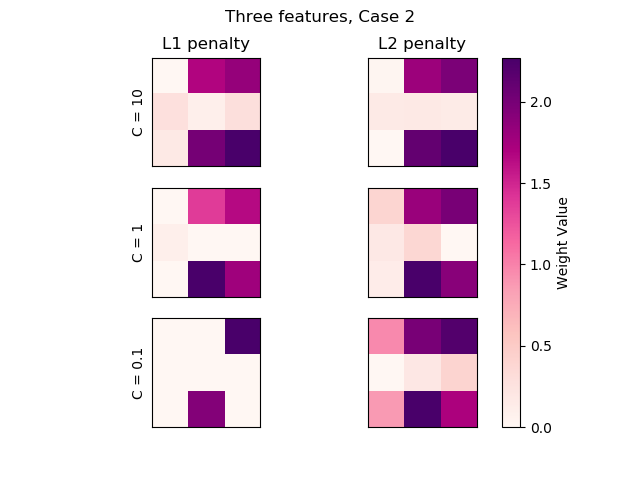

C = 10.00
Accuracy with L1 penalty:                96.67%
Accuracy with L2 penalty:                96.67%
C = 1.00
Accuracy with L1 penalty:                95.33%
Accuracy with L2 penalty:                95.33%
C = 0.10
Accuracy with L1 penalty:                96.00%
Accuracy with L2 penalty:                95.33%


<IPython.core.display.Javascript object>


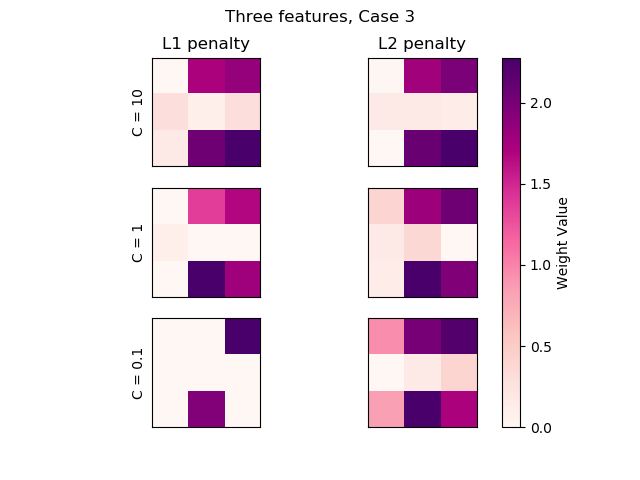

C = 10.00
Accuracy with L1 penalty:                96.67%
Accuracy with L2 penalty:                96.67%
C = 1.00
Accuracy with L1 penalty:                95.33%
Accuracy with L2 penalty:                95.33%
C = 0.10
Accuracy with L1 penalty:                96.00%
Accuracy with L2 penalty:                95.33%


<IPython.core.display.Javascript object>


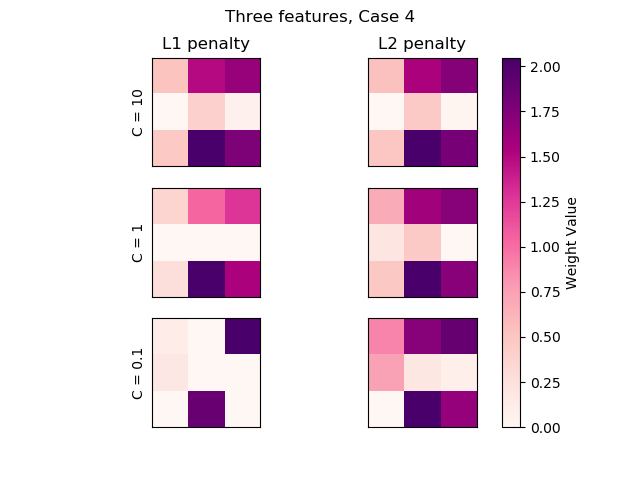

C = 10.00
Accuracy with L1 penalty:                97.33%
Accuracy with L2 penalty:                97.33%
C = 1.00
Accuracy with L1 penalty:                97.33%
Accuracy with L2 penalty:                97.33%
C = 0.10
Accuracy with L1 penalty:                94.67%
Accuracy with L2 penalty:                93.33%


In [103]:
for i in range(4):
    fig1, axes1, ims1 = plot_weights_C_reg(threeFeat[i], iris_df.loc[:, 'y'], cv)
    cbar = fig1.colorbar(ims1[0], ax=axes1, label="Weight Value")
    fig1.suptitle("Three features, Case " + str(i + 1))
    fig1.show()

The stem plots below also show the difference in weight values when different values of $C$ are used with an $L^{2}$ regularization. A large value of $C$ produces results similar to training without regularization. For $C = 100$, the weight values range widely in size.

<IPython.core.display.Javascript object>


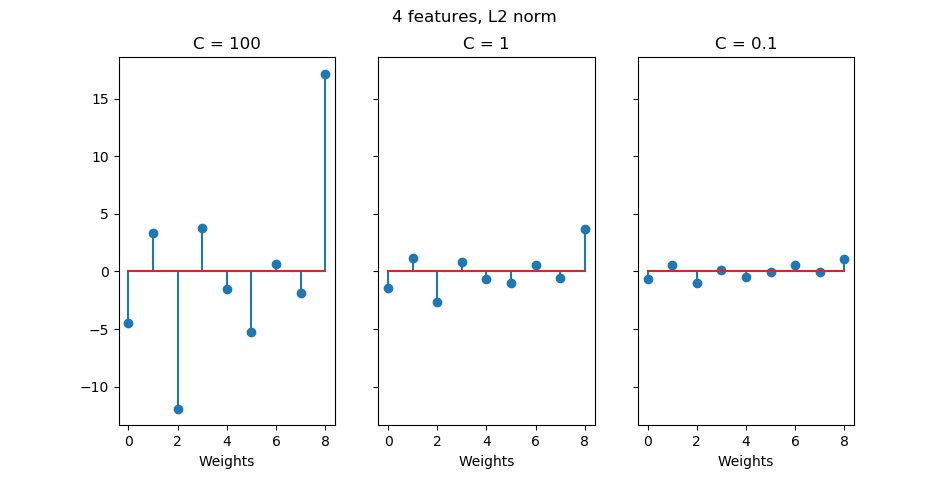

In [40]:
x_four_features = iris_df.columns[:3]
Xw = np.array(iris_df[x_four_features].values)

logreg_w = LogisticRegression(C=10e2)
logreg_w.fit(Xw, iris_df.loc[:, 'y'])
W = logreg_w.coef_ # (n_classes, n_features)
W_flat = W.flatten() # [i, j] -> [class, feature]

logreg2_w = LogisticRegression(C=1)
logreg2_w.fit(Xw, iris_df.loc[:, 'y'])
W2 = logreg2_w.coef_ # (n_classes, n_features)
W2_flat = W2.flatten() # [i, j] -> [class, feature]

logreg3_w = LogisticRegression(C=0.1)
logreg3_w.fit(Xw, iris_df.loc[:, 'y'])
W3 = logreg3_w.coef_ # (n_classes, n_features)
W3_flat = W3.flatten() # [i, j] -> [class, feature]

f1, a1 = plt.subplots(1, 3, sharey=True)
a1[0].stem(W_flat, use_line_collection=True, label='C = 100')
a1[0].set_title('C = 100')
a1[1].stem(W2_flat, use_line_collection=True, label='C = 1')
a1[1].set_title('C = 1')
a1[2].stem(W3_flat, use_line_collection=True, label='C = 0.1')
a1[2].set_title('C = 0.1')
a1[0].set_xlabel("Weights")
a1[1].set_xlabel("Weights")
a1[2].set_xlabel("Weights")
f1.suptitle("4 features, L2 norm")
f1.show()

For $C$ values of $1$ and $0.1$ and an $L^{2}$ norm, the weight values are closer in scale:

<IPython.core.display.Javascript object>


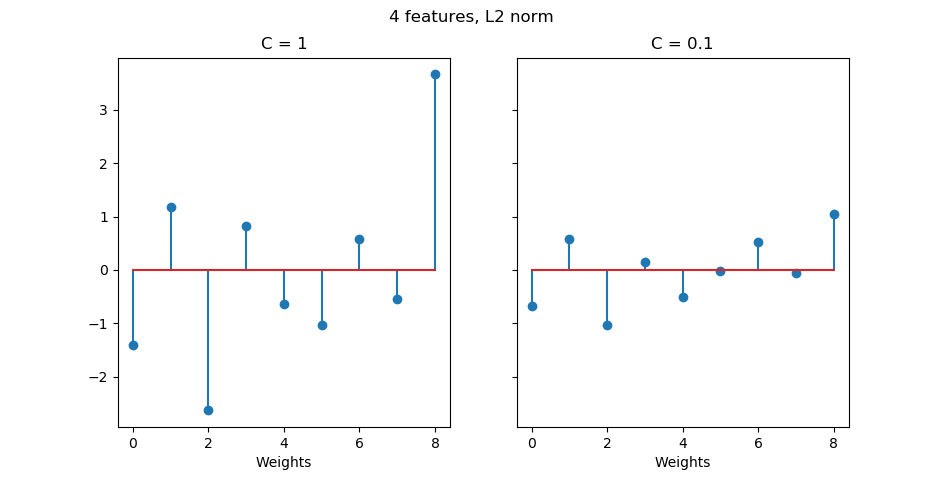

In [39]:
fig2, ax2 = plt.subplots(1, 2, sharey=True)
ax2[0].stem(W2_flat, use_line_collection=True, label='C = 1')
ax2[1].stem(W3_flat, use_line_collection=True, label='C = 0.1')
ax2[0].set_title("C = 1")
ax2[1].set_title("C = 0.1")
ax2[0].set_xlabel("Weights")
ax2[1].set_xlabel("Weights")
fig2.suptitle("4 features, L2 norm")
fig2.show()